In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [23]:
file_path = "C:/Users/onkar/Downloads/5_May_prj/Clustering_Project_10/EastWestAirlines.xlsx"
data = pd.read_excel(file_path, sheet_name= 'data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [25]:
df = data.copy()
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [26]:
df = df.drop(columns=['ID#'])
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [27]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [30]:
scaled_df[:5]

array([[-0.45114078, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.70278627, -1.10406452, -0.32860326, -0.36216787,  1.39545434,
        -0.7669193 ],
       [-0.53945687, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.7010884 , -0.99992616, -0.32860326, -0.36216787,  1.37995704,
        -0.7669193 ],
       [-0.32003123, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.5392527 , -0.79164945, -0.32860326, -0.36216787,  1.41192021,
        -0.7669193 ],
       [-0.58379852, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.68928615, -1.10406452, -0.32860326, -0.36216787,  1.37220839,
        -0.7669193 ],
       [ 0.23967783, -0.18629869,  1.40947095, -0.09824189, -0.06276658,
         1.08312117,  1.49939447,  1.15493205,  0.69249029,  1.36397545,
         1.30391816]])

In [31]:
from sklearn.cluster import KMeans

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

C:\Users\onkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\onkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\onkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\onkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

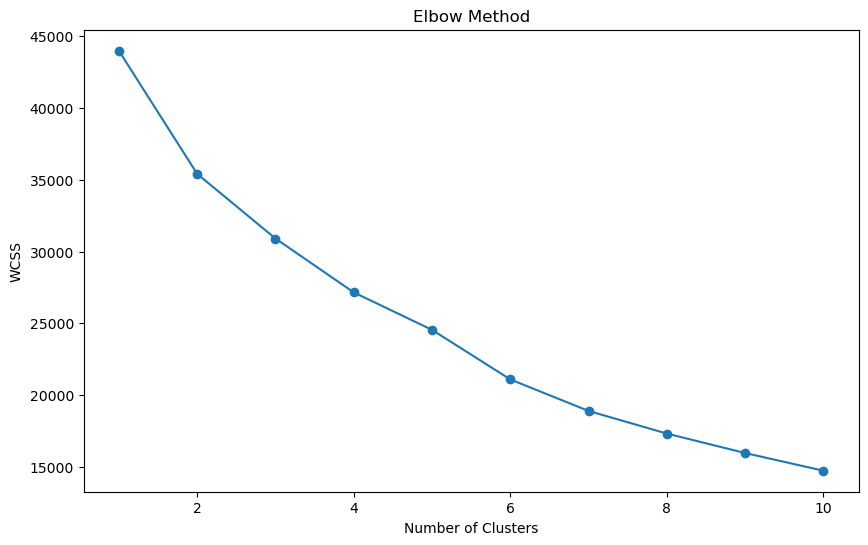

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
optimum_clusters = 4

In [41]:
kmeans = KMeans(n_clusters=optimum_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_df)

C:\Users\onkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_df)

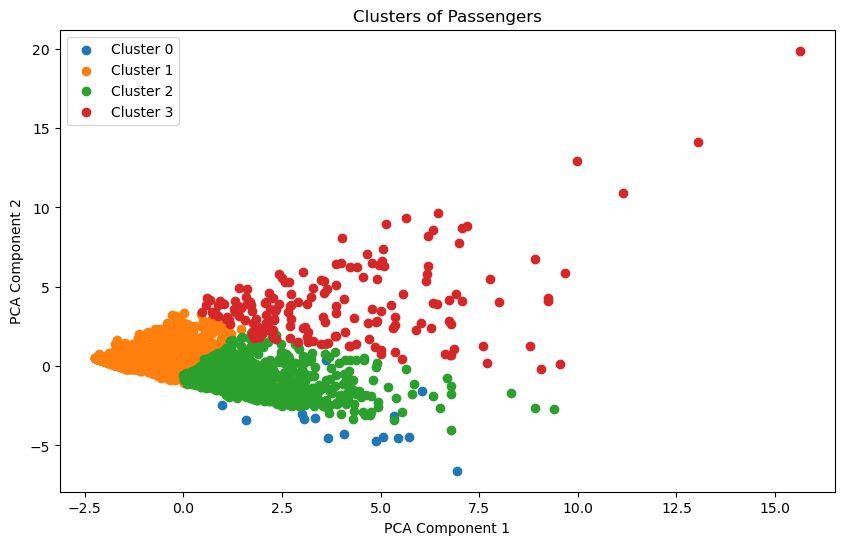

In [47]:
plt.figure(figsize=(10, 6))
for cluster in range(optimum_clusters):
    plt.scatter(data_pca[data['Cluster'] == cluster, 0], 
                data_pca[data['Cluster'] == cluster, 1], 
                label=f'Cluster {cluster}')
plt.title('Clusters of Passengers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [49]:
import joblib

In [50]:
joblib.dump(kmeans,'KNN_clusV1.sav')

['KNN_clusV1.sav']